In [1]:
import cv2
import os
import matplotlib.pyplot  as plt


Load image

In [4]:
path = 'C:/Users/agasc/Desktop/29/29/14.08.24-15.08.24'
image_files = os.listdir(path)[:10]
print (image_files)

['HM20240814213403.jpeg', 'HM20240814213507.jpeg', 'HM20240814213609.jpeg', 'HM20240814213710.jpeg', 'HM20240814213814.jpeg', 'HM20240814213916.jpeg', 'HM20240814214018.jpeg', 'HM20240814214120.jpeg', 'HM20240814214221.jpeg', 'HM20240814214323.jpeg']


Show images

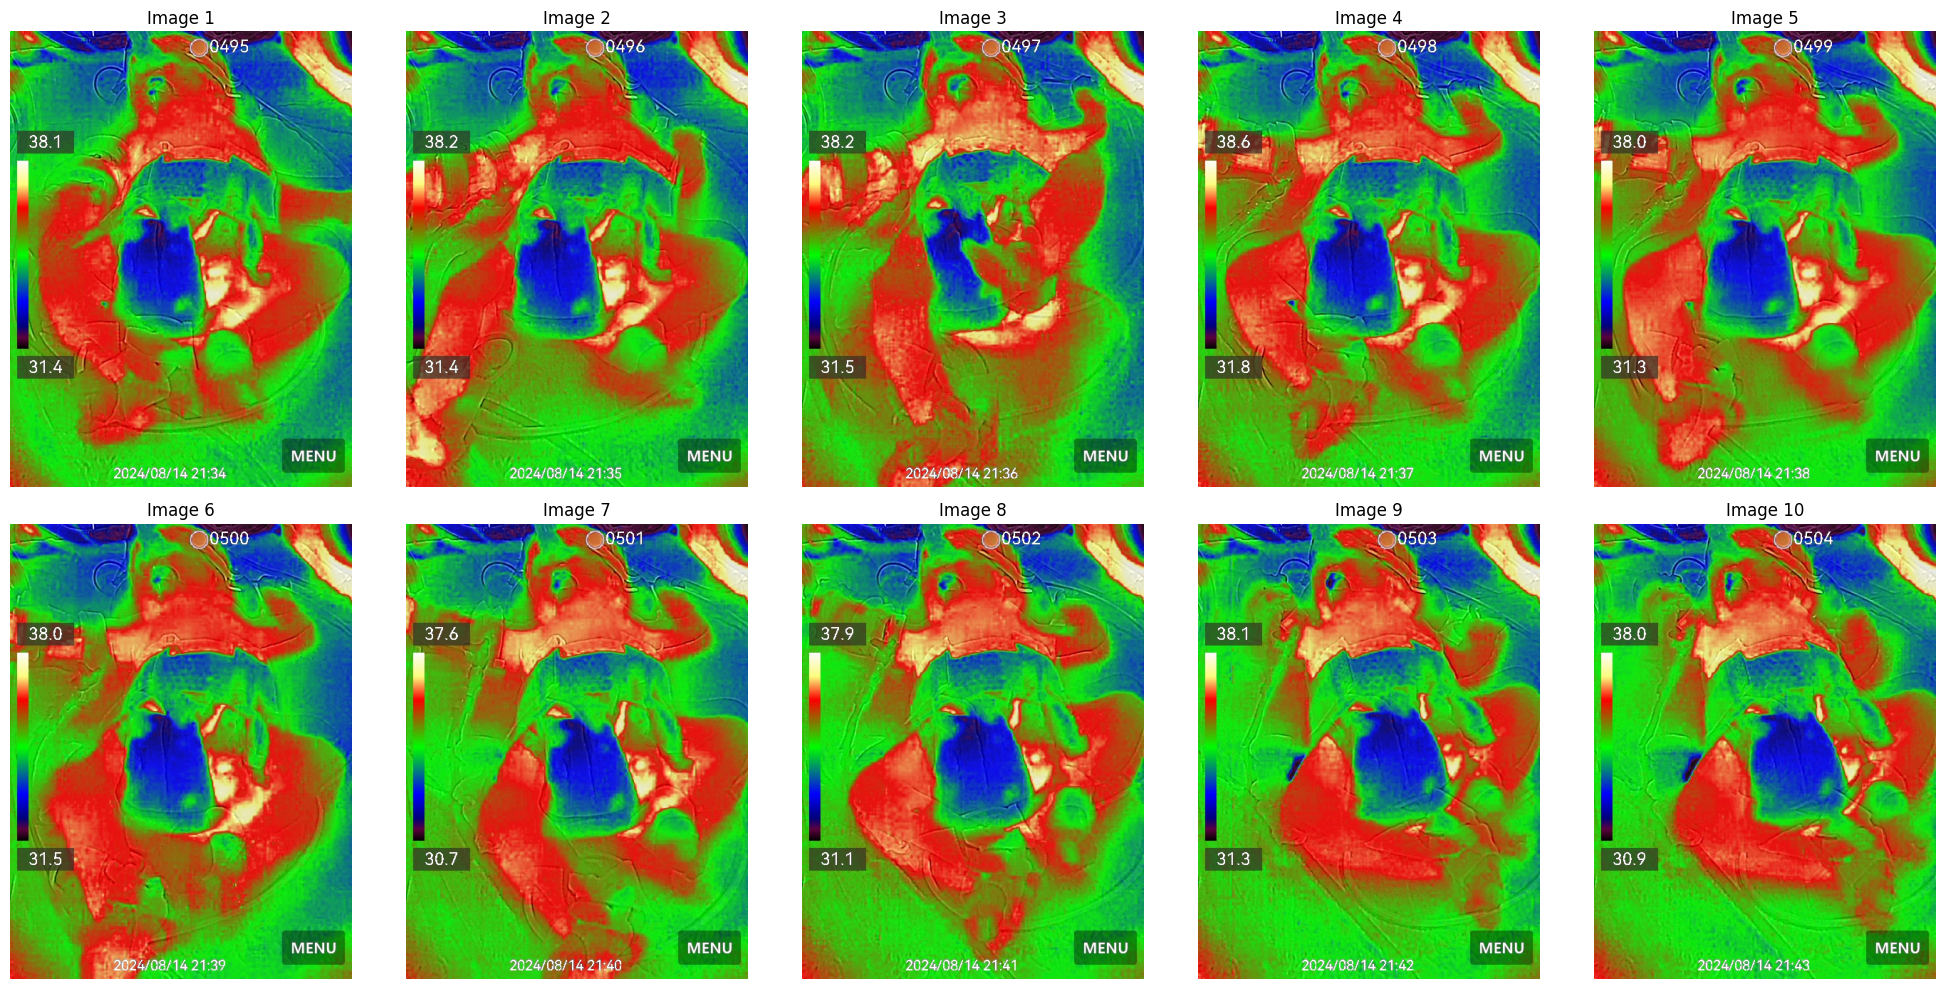

In [5]:
plt.figure(figsize=(20, 10))
for i,img_name in enumerate (image_files):
    image_path = os.path.join (path, img_name)
    image = cv2.imread (image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)  # Arrange in a 2-row, 5-column grid
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()    

**Skeletonization Raw Test**

In [2]:
# requirement: pip install --user mediapipe
import mediapipe as mp

Initialize MediaPose

In [7]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.2  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

No landmarks detected in HM20240814213403.jpeg
No landmarks detected in HM20240814213507.jpeg
No landmarks detected in HM20240814213609.jpeg
Landmarks detected in HM20240814213710.jpeg
No landmarks detected in HM20240814213814.jpeg
No landmarks detected in HM20240814213916.jpeg
No landmarks detected in HM20240814214018.jpeg
Landmarks detected in HM20240814214120.jpeg
Landmarks detected in HM20240814214221.jpeg
Landmarks detected in HM20240814214323.jpeg


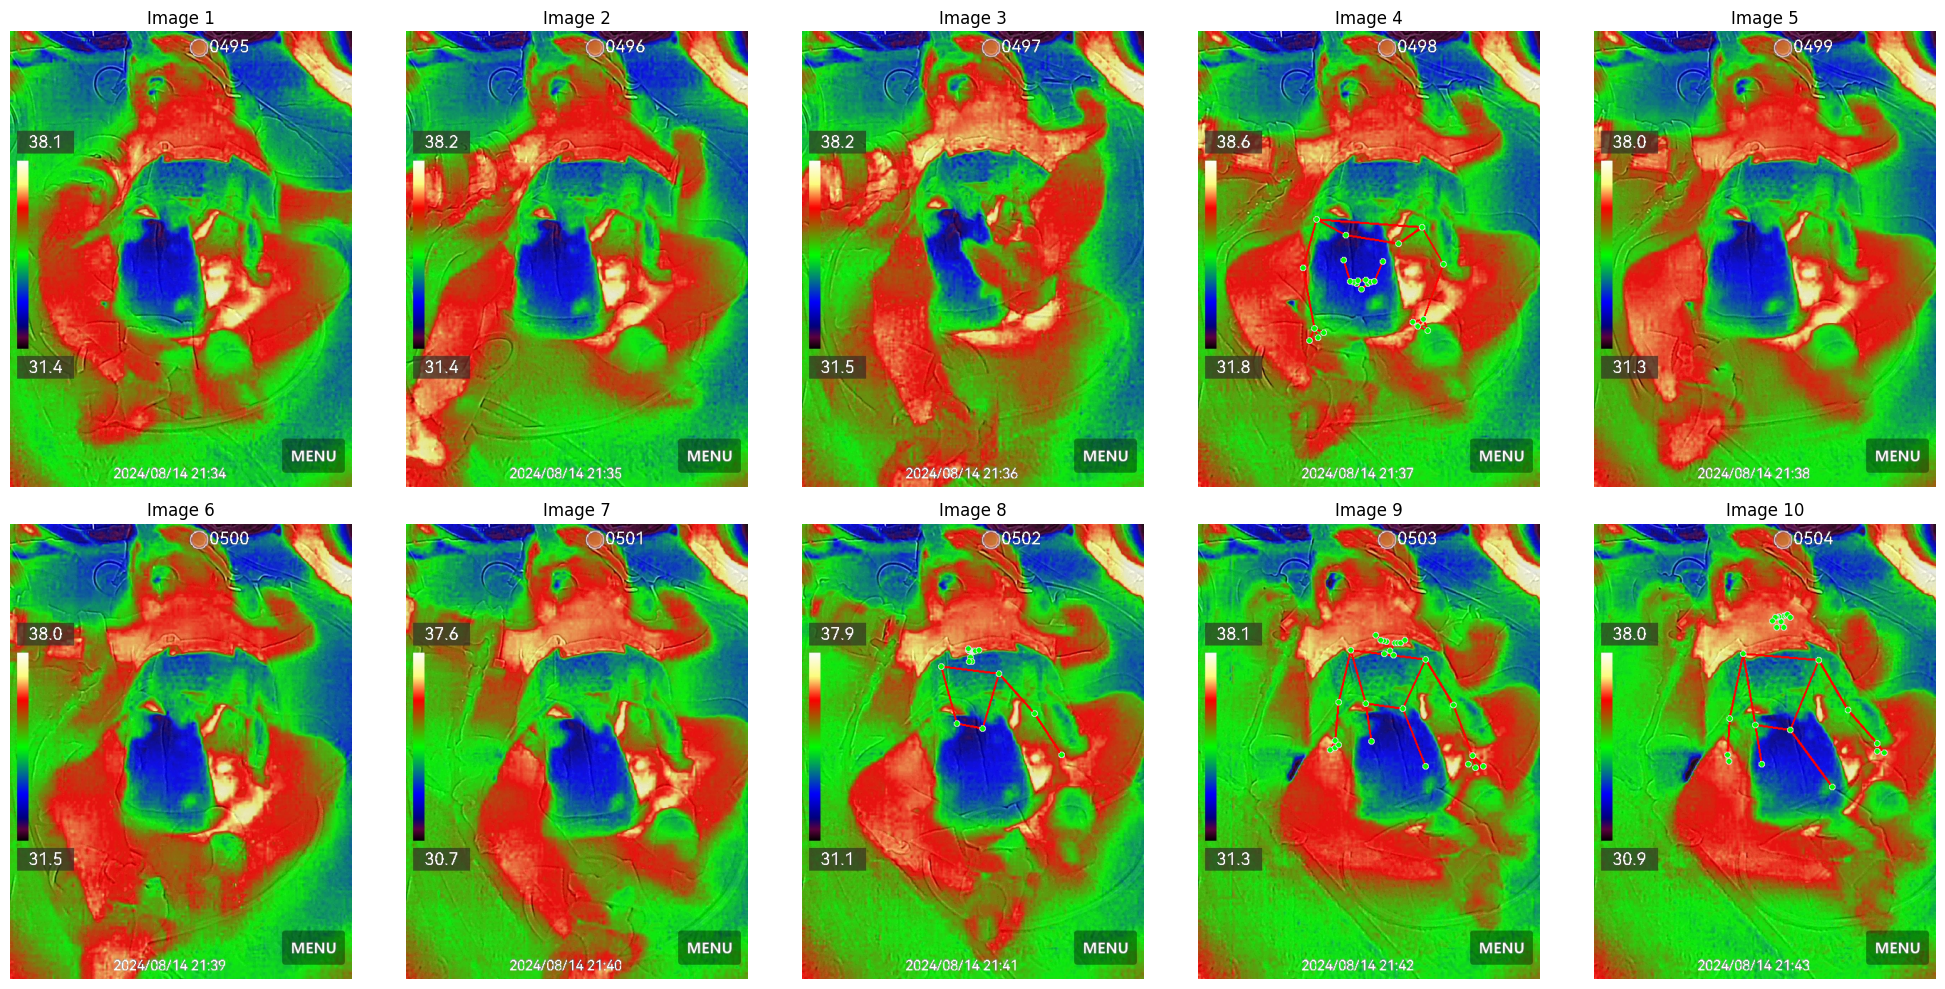

In [8]:
# Create a figure to display the images
plt.figure(figsize=(20, 10))

# Process each image
for i, img_name in enumerate(image_files):
    image_path = os.path.join(path, img_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Process the image
    results = pose.process(image_rgb)
    annotated_image = image_rgb.copy()

    # Draw the pose skeleton on the image
    if results.pose_landmarks:
        print(f"Landmarks detected in {img_name}")
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
        )
    else:
        print(f"No landmarks detected in {img_name}")
    # Display the processed image
    plt.subplot(2, 5, i + 1)  # Arrange in a 2-row, 5-column grid
    plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
    plt.axis("off")
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()

**Skeletonization with Preprocessing Test**

In [13]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.2  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

Function for preprocessing Images

In [72]:
import cv2
import numpy as np

def image_preprocessing(image):
    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for green color in HSV
    lower_green = np.array([30, 50, 50])  # Lower bound of green in HSV
    upper_green = np.array([85, 255, 255])  # Upper bound of green in HSV

    # Create a mask for the green color
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Apply Gaussian blur to the mask
    blurred = cv2.GaussianBlur(green_mask, (7, 7), 0)

    cv2.imshow('Processed Image', blurred)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Apply thresholding
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Detect edges
    edges = cv2.Canny(morphed, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a blank image
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    return contour_image

No landmarks detected in HM20240814213403.jpeg
No landmarks detected in HM20240814213507.jpeg
No landmarks detected in HM20240814213609.jpeg
No landmarks detected in HM20240814213710.jpeg
No landmarks detected in HM20240814213814.jpeg
No landmarks detected in HM20240814213916.jpeg
No landmarks detected in HM20240814214018.jpeg
No landmarks detected in HM20240814214120.jpeg
No landmarks detected in HM20240814214221.jpeg
No landmarks detected in HM20240814214323.jpeg


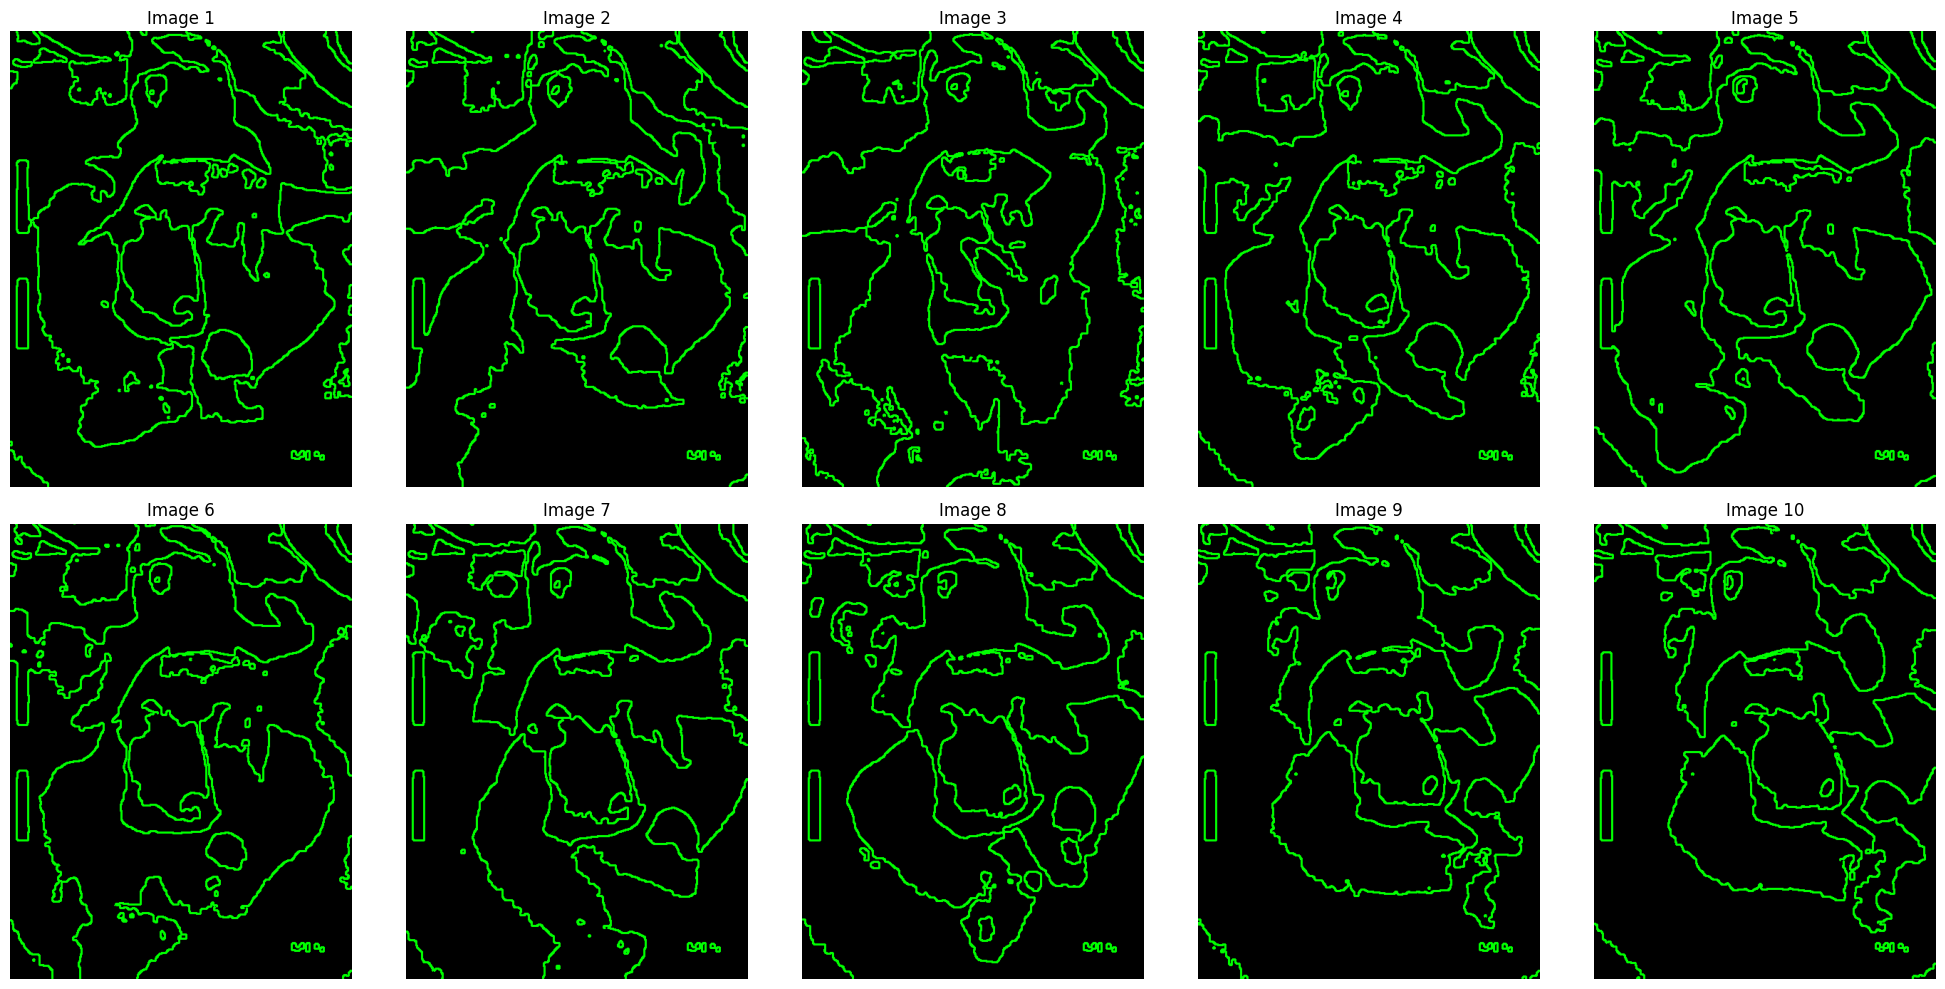

In [75]:
# Create a figure to display the images
plt.figure(figsize=(20, 10))

# Process each image
for i, img_name in enumerate(image_files):
    image_path = os.path.join(path, img_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image_rgb = image_preprocessing (image_rgb)

    # Process the image
    results = pose.process(image_rgb)
    annotated_image = image_rgb.copy()

    # Draw the pose skeleton on the image
    if results.pose_landmarks:
        print(f"Landmarks detected in {img_name}")
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
        )
    else:
        print(f"No landmarks detected in {img_name}")
    # Display the processed image
    plt.subplot(2, 5, i + 1)  # Arrange in a 2-row, 5-column grid
    plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
    plt.axis("off")
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()

**Foto baby without thermal imaging**

In [84]:
path = "C:/Users/agasc/Desktop/3r AI/2nd Semester/Synthesis Project/descarga.jpeg"

In [81]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.2  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

Landmarks detected in HM20240814214323.jpeg


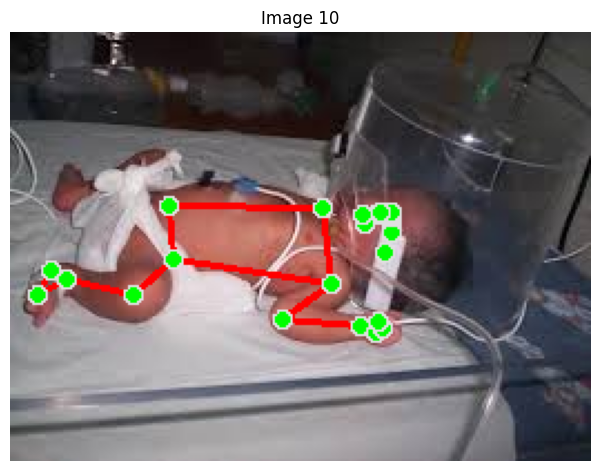

In [85]:
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Process the image
results = pose.process(image_rgb)
annotated_image = image_rgb.copy()

# Draw the pose skeleton on the image
if results.pose_landmarks:
    print(f"Landmarks detected in {img_name}")
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
    )
else:
    print(f"No landmarks detected in {img_name}")
# Display the processed image
plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
plt.axis("off")
plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()

**Normal image with our data**

In [90]:
path = "C:/Users/agasc/Desktop/3r AI/2nd Semester/Synthesis Project/Screenshot 2025-03-09 195553.png"

In [93]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.2  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

Landmarks detected in HM20240814214323.jpeg


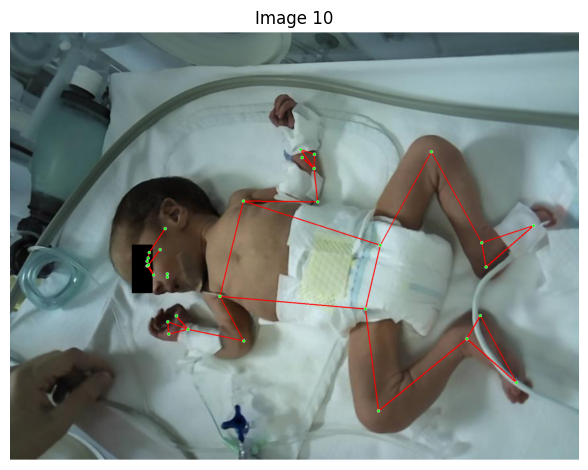

In [94]:
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Process the image
results = pose.process(image_rgb)
annotated_image = image_rgb.copy()

# Draw the pose skeleton on the image
if results.pose_landmarks:
    print(f"Landmarks detected in {img_name}")
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
    )
else:
    print(f"No landmarks detected in {img_name}")
# Display the processed image
plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
plt.axis("off")
plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()

In [15]:
path = "C:/Users/agasc/Desktop/3r AI/2nd Semester/Synthesis Project/Early-detection-of-neonatal-sepsis-using-thermal-images/high-angle-view-of-newborn-baby-in-hospital-crib-CAVF23522.jpg"

In [20]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.1  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

NameError: name 'i' is not defined

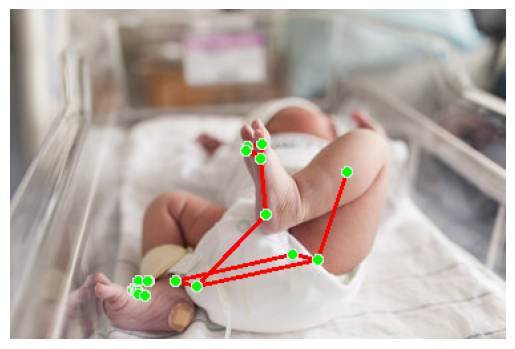

In [21]:
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Process the image
results = pose.process(image_rgb)
annotated_image = image_rgb.copy()

# Draw the pose skeleton on the image
if results.pose_landmarks:
    #print(f"Landmarks detected in {image}")
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
    )
else:
    print(f"No landmarks detected in {image}")
# Display the processed image
plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
plt.axis("off")
plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()